## Basic Recommedation system

In [1]:
import numpy as np
import pandas as pd

In [2]:
credits = pd.read_csv('tmdb_5000_credits.csv')
movies = pd.read_csv('tmdb_5000_movies.csv')

In [3]:
credits.head(2)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [4]:
movies.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [5]:
data = credits.merge(movies,left_on = 'movie_id', right_on = 'id')
data.head(2)

,movie_id,title_x,cast,crew,budget,genres,homepage,id,keywords,original_language,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title_y,vote_average,vote_count
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [6]:
data.columns

Index(['movie_id', 'title_x', 'cast', 'crew', 'budget', 'genres', 'homepage',
       'id', 'keywords', 'original_language', 'original_title', 'overview',
       'popularity', 'production_companies', 'production_countries',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'status',
       'tagline', 'title_y', 'vote_average', 'vote_count'],
      dtype='object')

In [7]:
final_data = data[['movie_id','title_x','vote_average','vote_count','popularity']]
final_data.head(2)

,movie_id,title_x,vote_average,vote_count,popularity
0,19995,Avatar,7.2,11800,150.437577
1,285,Pirates of the Caribbean: At World's End,6.9,4500,139.082615


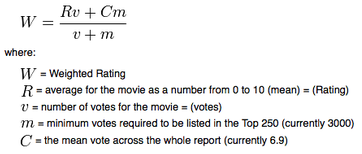

In [8]:
R = final_data['vote_average'] # average for the movies as a number from 0 to 10(mean) = (Rating)
V = final_data['vote_count']   # number of votes for the movie = (votes)
M = final_data['vote_count'].quantile(.70) # minimum votes required to be listed in the top 250
C = final_data['vote_average'].mean() # the mean vote across the whole report

In [9]:
# below is the formula for weighted rating
final_data['weighted Rating'] = ((R*V) + (C*M))/(V+M)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
final_data.head()

,movie_id,title_x,vote_average,vote_count,popularity,weighted Rating
0,19995,Avatar,7.2,11800,150.437577,7.148013
1,285,Pirates of the Caribbean: At World's End,6.9,4500,139.082615,6.807627
2,206647,Spectre,6.3,4466,107.376788,6.276075
3,49026,The Dark Knight Rises,7.6,9106,112.312950,7.509565
4,49529,John Carter,6.1,2124,43.926995,6.098319


In [14]:
# Recommending top 5 based on popularity
final_data.nlargest(n = 5, columns = 'popularity')

,movie_id,title_x,vote_average,vote_count,popularity,weighted Rating
546,211672,Minions,6.4,4571,875.581305,6.365286
95,157336,Interstellar,8.1,10867,724.247784,7.998100
788,293660,Deadpool,7.4,10995,514.569956,7.334360
94,118340,Guardians of the Galaxy,7.9,9742,481.098624,7.798252
127,76341,Mad Max: Fury Road,7.2,9427,434.278564,7.135687


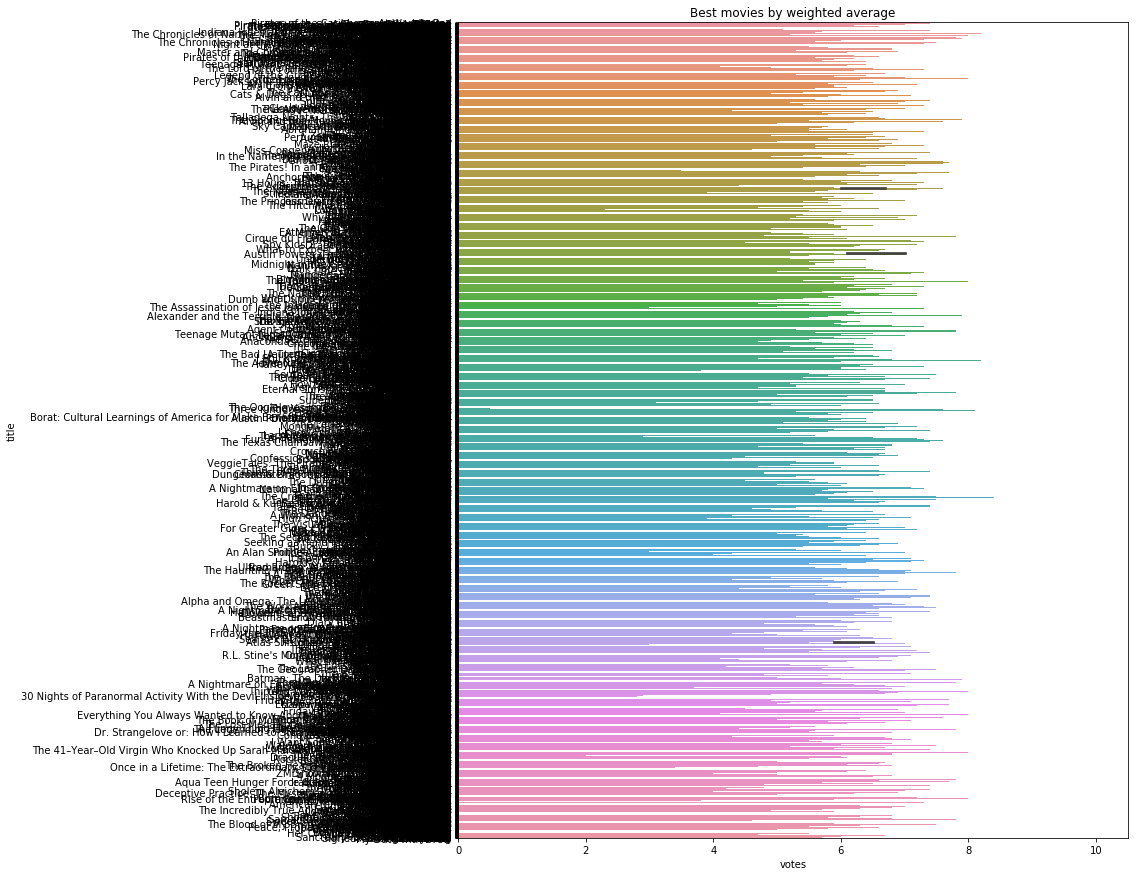

In [55]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize = (12,15))
sns.barplot(x = final_data['vote_average'], y = final_data['title_x'],data = final_data)
plt.title('Best movies by weighted average')
plt.xlabel('votes')
plt.ylabel('title')
plt.show()

In [27]:
# Normalizing the data to bring it into same scale
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
movies_rec = scale.fit_transform(final_data[['popularity','weighted Rating']])

In [29]:
movies_rec1= pd.DataFrame(movies_rec)
movies_rec1 = movies_rec1.rename(columns = {0:'Scaled_Popularity',1:'Scaled_Weigted_Rating'})
movies_rec1.head()

,Scaled_Popularity,Scaled_Weigted_Rating
0,0.171815,0.674339
1,0.158846,0.581403
2,0.122635,0.436273
3,0.128272,0.773054
4,0.050169,0.387739


In [35]:
# adding the above data frame two columns to the final_data dataframe
final_data[['Scaled_Popularity','Scaled_Weigted_Rating']] =movies_rec1[['Scaled_Popularity','Scaled_Weigted_Rating']]
final_data.head()

,movie_id,title_x,vote_average,vote_count,popularity,weighted Rating,Scaled_Popularity,Scaled_Weigted_Rating
0,19995,Avatar,7.2,11800,150.437577,7.148013,0.171815,0.674339
1,285,Pirates of the Caribbean: At World's End,6.9,4500,139.082615,6.807627,0.158846,0.581403
2,206647,Spectre,6.3,4466,107.376788,6.276075,0.122635,0.436273
3,49026,The Dark Knight Rises,7.6,9106,112.312950,7.509565,0.128272,0.773054
4,49529,John Carter,6.1,2124,43.926995,6.098319,0.050169,0.387739


In [51]:
# calculating the score 
final_data['Score']= ((final_data['Scaled_Popularity'] + final_data['Scaled_Weigted_Rating'])/2)

In [54]:
# recommending the top 5 movies based on the score
final_data.nlargest(n = 5, columns = 'Score')['title_x']

95                Interstellar
546                    Minions
94     Guardians of the Galaxy
788                   Deadpool
127         Mad Max: Fury Road
Name: title_x, dtype: object